# Figure S7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import special
from scipy.stats import weibull_min

from itertools import product

This is in accordance with Chen, M., Qi, J., Poo, M., & Yang, Y. (2022). Stability and dynamics of dendritic spines in macaque prefrontal cortex. National Science Review, 9.
In this work, the inter-synaptic distance is taken to follow a weibull distribution.

In [2]:
def sample_estimates(ax, n_samples, c, scale):

    true_mean = scale * special.gamma(1 + 1/c)

    isd = weibull_min.rvs(c=1.5, scale=scale, size=(n_samples,100))

    spines_x = np.cumsum(isd, axis=1)

    obs_spine_x = np.abs(spines_x - spines_x[:,50].reshape(n_samples,1))
    obs_spine_x.sort(axis=1)

    sub_spine_x = obs_spine_x[:, ::2]
    obs_isd = sub_spine_x[:,1:] - sub_spine_x[:,:-1]
    inferred_means = obs_isd.mean(axis=1)
    # inferred_means = np.median(obs_isd, axis=1)

    rel_error = (inferred_means - true_mean)/true_mean
    expected_rel_error = rel_error.mean()
    std_rel_error = rel_error.std()

    vals, _, _ = ax.hist(
        rel_error,
        bins=50,
        density=True,
        alpha=0.3,
    )

    ax.axvline(
        expected_rel_error, 
        c='tab:blue',
    )
        
    ax.annotate(
        r'$MRE = {:.1f}\%$'.format(
            np.abs(expected_rel_error)*100
        ),
        (expected_rel_error*1.5, vals.max()*0.4),
        # fontsize=8,
    )


    # ax.set_xlabel(r'Estimate $\tilde{d} \; [\mu m]$')
    ax.set_yticks([])

    return true_mean

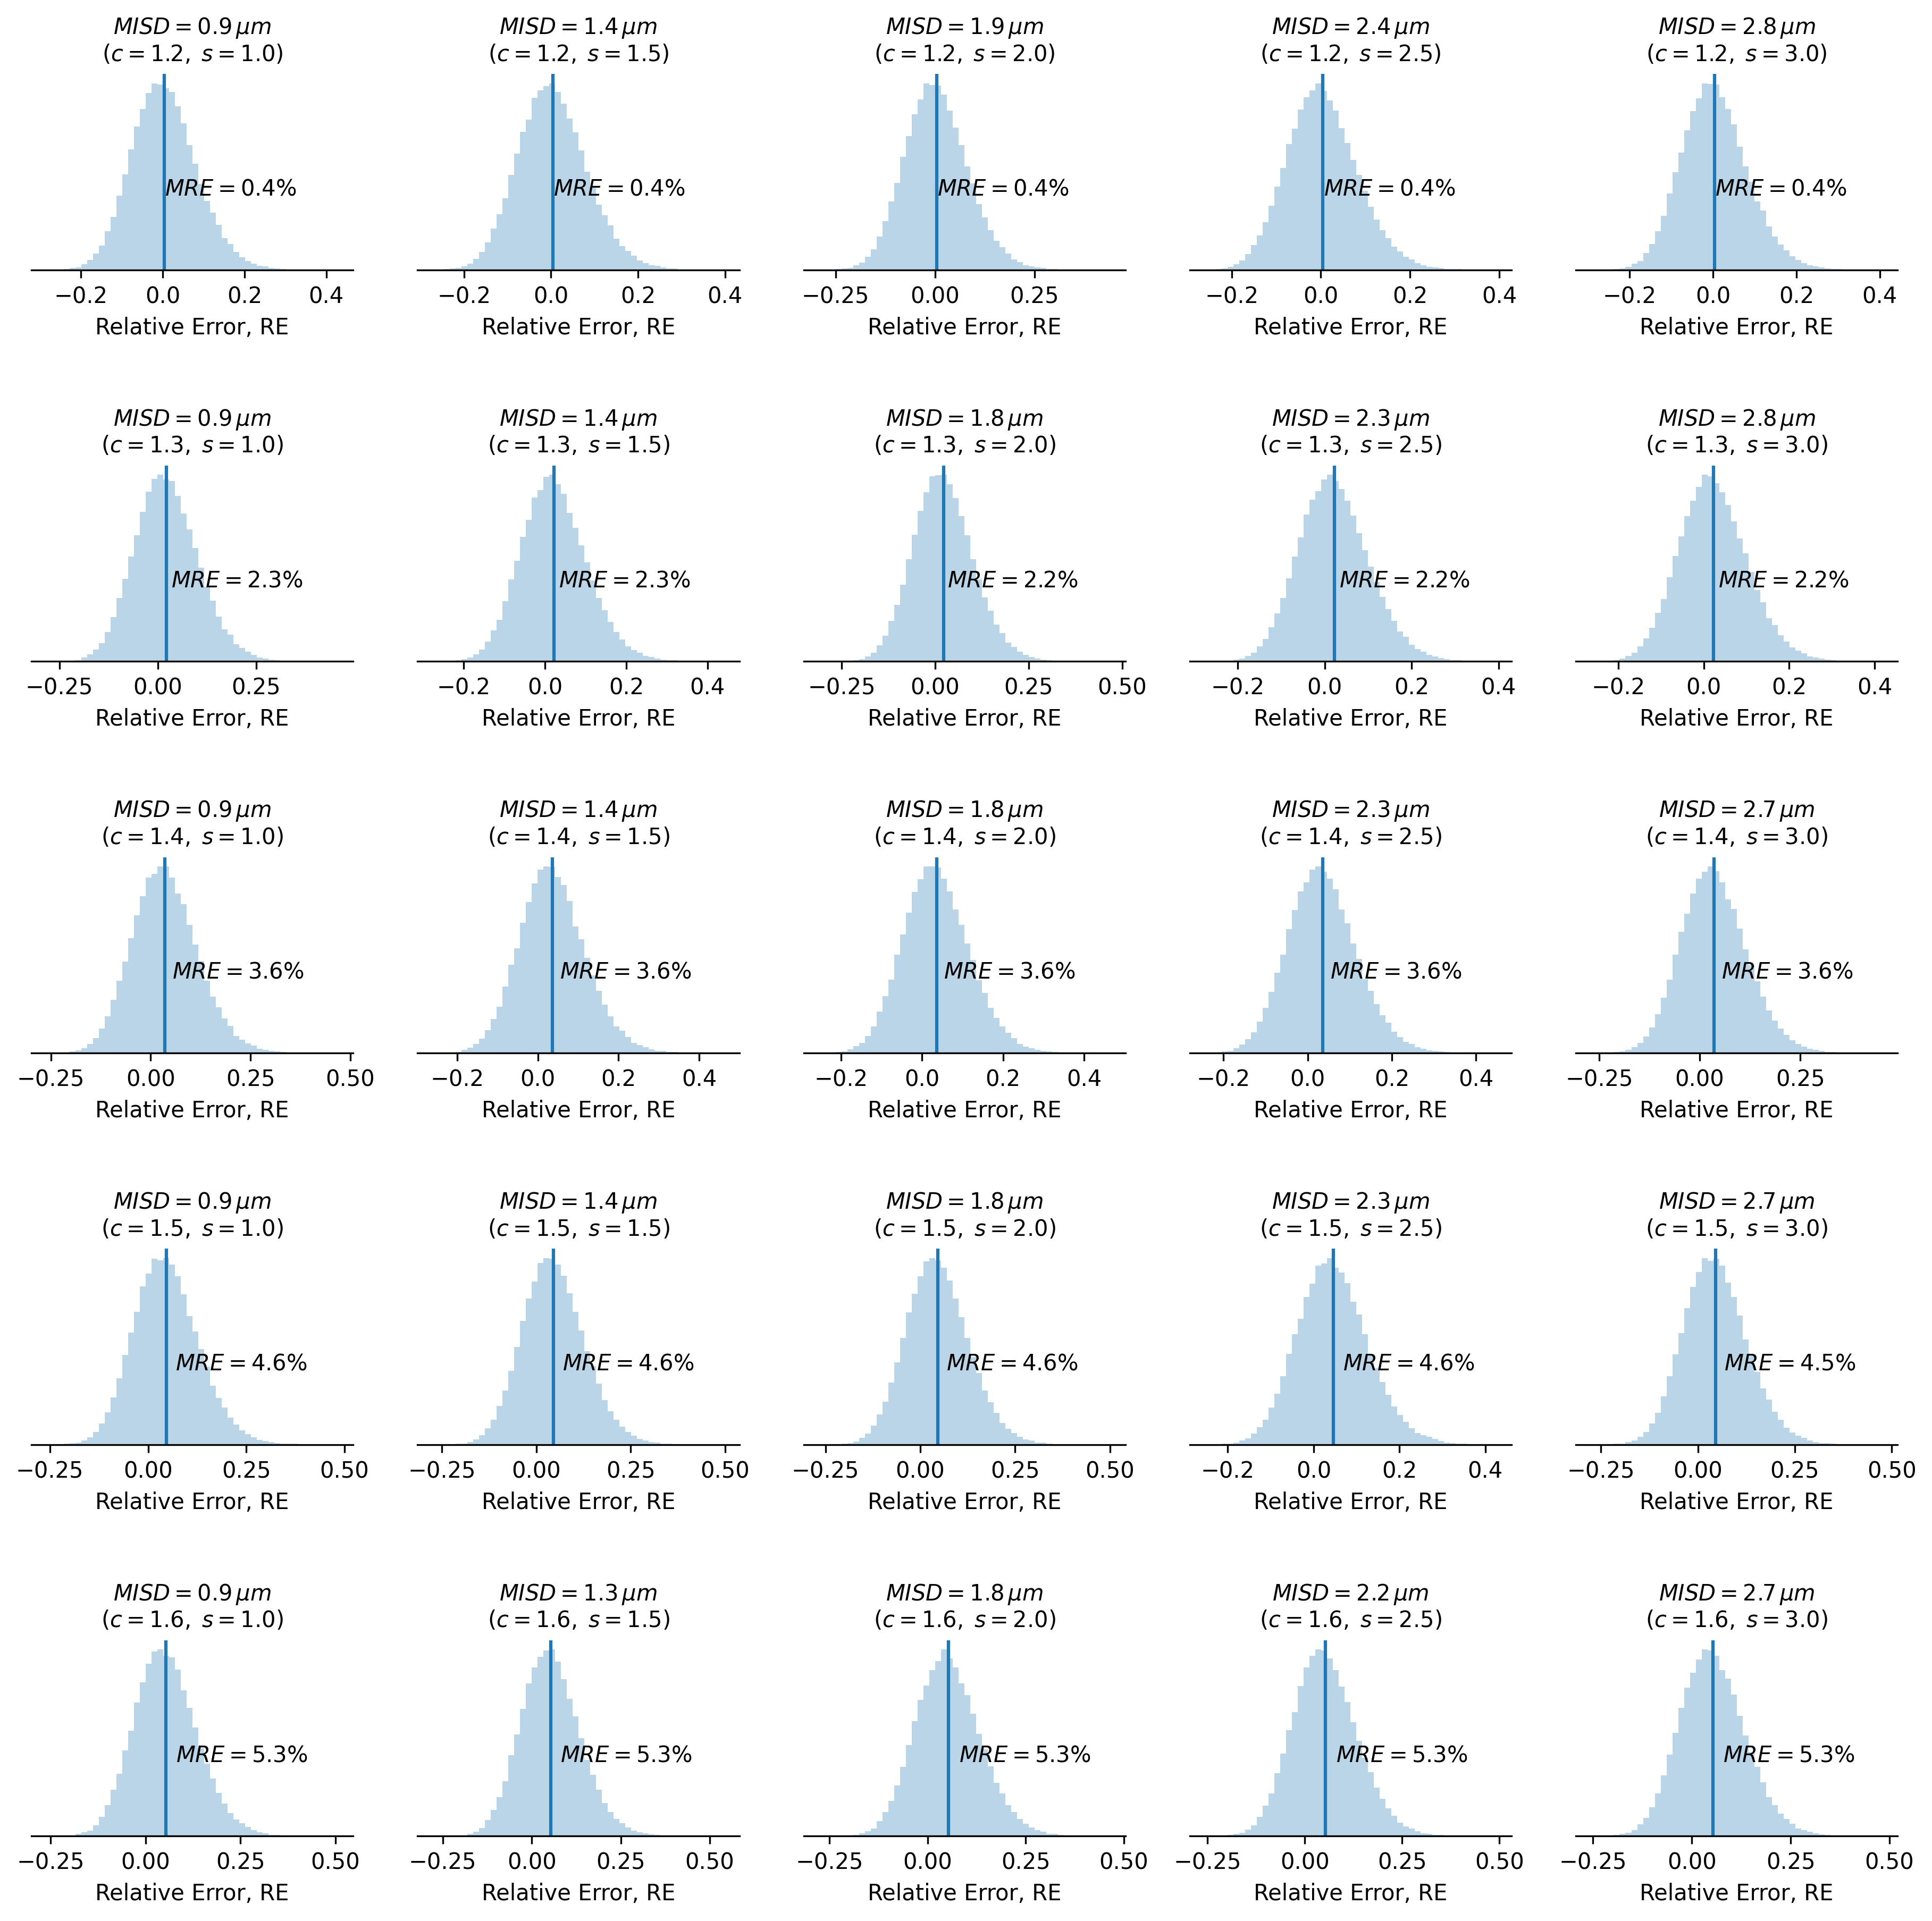

In [3]:
fig, axs = plt.subplots(5,5, figsize=(13,13), dpi=300)
fig.subplots_adjust(hspace=1, top=0.95, bottom=0.1, left=0.05, right=0.95)

n_samples = 100000

cs = [1.2,1.3,1.4,1.5,1.6]
scales = [1.,1.5,2.,2.5,3.]

for ax, (c, scale) in zip(
    axs.flatten(),
    product(
        cs,
        scales,
    )
):
    true_mean = sample_estimates(ax, n_samples, c, scale)
    mean = scale * special.gamma(1 + 1/c)
    ax.set_title(
        r'$MISD = {:.1f} \, \mu m$'.format(true_mean) + '\n'
        r'$(c = {:.1f}, \; s = {:.1f})$'.format(c, scale),
        fontsize=10,
    )


for ax in axs.flatten():
    ax.set_xlabel('Relative Error, RE')
    for k, v in ax.spines.items():
        if k != 'bottom': v.set_visible(False)

# plt.savefig('figures-paper/supplementary/isd-estimation.png')